# Importação das bibliotecas

In [39]:
from scipy.stats import t
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from typing import List
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind


In [6]:
def obter_intervalo_confianca(dataframe: pd.DataFrame):    
    conf_level = 0.95
    media = dataframe['preco'].mean()
    std = dataframe['preco'].std()
    n = dataframe.shape[0]
    grausLiberdade = n - 1
    t_value = t.ppf((1 + conf_level) / 2, grausLiberdade)
    inf = media - t_value * std / np.sqrt(n)
    sup = media + t_value * std / np.sqrt(n)
    print('Média:', round(media), ' Desvio padrão:', round(std))
    print('Intervalo de confiança:', round(inf), '-', round(sup))

In [7]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None) -> pd.DataFrame:
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa.parquet')
    base_original = base_original.query(query)
    return base_original

In [8]:
def obter_estatistica(bairros: List[str], base_original_completa: pd.DataFrame) -> pd.DataFrame:
    lista_dados = []
    for bairro in bairros:
        dados_temp = base_original_completa.query(
            f'bairro_teste == "{bairro}"')
        lista_dados.append(
            {
                'bairro': bairro,
                'media_preco':  round(dados_temp['preco'].mean(), 2),
                'mediana_preco':  round(dados_temp['preco'].median(), 2),
                'moda': round(dados_temp['preco'].mode()[0], 2),
                'desvio_padrao': round(dados_temp['preco'].std(), 2),
                'total_imoveis': dados_temp.shape[0],
                'coeficiente_variacao': (round(dados_temp['preco'].std(), 2) / round(dados_temp['preco'].mean(), 2)) * 100
            }
        )
    df = pd.DataFrame(lista_dados)
    return df
  

- Preço Geral

In [9]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original['quarto'] = base_original['quarto'].str.replace('1 Quarto', '1').astype('int32')
base_original['garagem'] = base_original['garagem'].str.replace('--', '0').astype('int32')
base_original['metragem'] = base_original['metragem'].astype('int32')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


In [10]:
base_original = base_original.drop_duplicates()
base_original.shape

(8395, 9)

In [11]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8395 entries, 0 to 9971
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tipo_imovel   8395 non-null   string 
 1   nome          8395 non-null   string 
 2   preco         8395 non-null   float64
 3   metragem      8395 non-null   int32  
 4   quarto        8395 non-null   int32  
 5   banheiro      8395 non-null   string 
 6   garagem       8395 non-null   int32  
 7   ID_CASA       8395 non-null   int64  
 8   bairro_teste  8395 non-null   string 
dtypes: float64(1), int32(3), int64(1), string(4)
memory usage: 557.5 KB


In [12]:
base_original['banheiro'].unique()

<StringArray>
[ '2 ',  '1 ',  '3 ',  '5 ',  '4 ',  '9 ',  '7 ',  '6 ', '20 ',  '8 ', '11 ',
 '13 ', '12 ', '10 ']
Length: 14, dtype: string

In [13]:
base_original['garagem'].unique()

array([  1,   2,   0,   4,   3,   5, 192,  10,  19,   6,   8,   7],
      dtype=int32)

In [14]:
base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')

/tmp/ipykernel_5314/3966004037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')


In [15]:
base_original.describe()

,preco,metragem,quarto,banheiro,garagem,ID_CASA
count,8395.00,8395.00,8395.00,8395.00,8395.00,8395.00
mean,450640.89,87.23,2.32,2.10,1.46,2635153434.16
std,453436.77,87.68,0.77,1.32,2.23,98351619.28
min,61045.00,10.00,1.00,1.00,0.00,54472404.00
25%,215000.00,49.00,2.00,1.00,1.00,2603212877.50
50%,320000.00,70.00,2.00,2.00,1.00,2658818753.00
75%,520000.00,103.00,3.00,3.00,2.00,2678280998.00
max,8000000.00,4687.00,20.00,20.00,192.00,2700624992.00


- Total Imóveis

In [16]:
base_original.groupby('bairro_teste').size().reset_index(name='count').sort_values(by='count', ascending=False).nlargest(50, 'count')


,bairro_teste,count
34,Jardim Botânico,739
9,Centro,736
98,Nova Aliança,661
51,Jardim Irajá,353
74,Jardim Paulista,315
137,Ribeirânia,235
8,Campos Eliseos,178
73,Jardim Palma Travassos,175
69,Jardim Olhos D Agua,172
29,Ipiranga,166


In [17]:
base_original.columns

Index(['tipo_imovel', 'nome', 'preco', 'metragem', 'quarto', 'banheiro',
       'garagem', 'ID_CASA', 'bairro_teste'],
      dtype='object')

- Total de imoveis ,Média, Moda e Mediana: Jardim Botânico, Centro, Nova Aliança, Jardim Irajá, Sumarezinho, Vila Tibério, Vila monte alegre 

In [18]:
bairros = ['Jardim Botânico', 'Centro', 'Nova Aliança', 'Jardim Irajá', 'Sumarezinho', 'Vila Tibério', 'Vila Monte Alegre', 'Bonfim Paulista', 'Jardim Nova Aliança Sul', 'Vila Tibério', 'Vila Virginia', 'Bonfim Paulista']

In [19]:
base_bairros = base_original[base_original['bairro_teste'].isin(bairros)]

In [20]:
base_bairros.head()

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
9,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2694181987,Jardim Botânico
14,Apartamento,"Apartamento com 2 Quartos à Venda, 84m²",298000.00,84,2,2,1,2586310967,Vila Monte Alegre


In [21]:
base_bairros.groupby('metragem').count()

,tipo_imovel,nome,preco,quarto,banheiro,garagem,ID_CASA,bairro_teste
metragem,,,,,,,,
10,3,3,3,3,3,3,3,3
18,1,1,1,1,1,1,1,1
20,1,1,1,1,1,1,1,1
23,1,1,1,1,1,1,1,1
24,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
530,2,2,2,2,2,2,2,2
700,1,1,1,1,1,1,1,1
721,1,1,1,1,1,1,1,1


In [22]:
base_bairros.pivot_table(index='garagem', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Centro,Jardim Botânico,Jardim Irajá,Jardim Nova Aliança Sul,Nova Aliança,Sumarezinho,Vila Monte Alegre,Vila Tibério,Vila Virginia
garagem,,,,,,,,,,
0,3,91,11,6,4,8,3,0,2,9
1,75,434,227,152,14,317,109,67,42,114
2,46,169,389,142,33,291,5,8,44,17
3,9,27,72,35,2,40,0,2,1,0
4,5,15,28,15,0,5,1,0,0,1
5,0,0,5,2,0,0,0,0,0,0
6,1,0,6,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0


In [23]:
base_bairros.pivot_table(index='quarto', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Centro,Jardim Botânico,Jardim Irajá,Jardim Nova Aliança Sul,Nova Aliança,Sumarezinho,Vila Monte Alegre,Vila Tibério,Vila Virginia
quarto,,,,,,,,,,
1,6,103,111,35,9,186,0,21,5,1
2,92,165,254,85,20,236,104,44,43,134
3,40,402,328,206,21,229,13,12,41,6
4,1,64,46,26,3,10,1,0,0,0
5,2,2,0,1,0,0,0,0,0,0
20,0,0,0,0,0,0,0,1,0,0


In [24]:
base_banheiro = base_bairros.pivot_table(index='banheiro', columns='bairro_teste', aggfunc='size', fill_value=0).sort_index().reset_index()
base_banheiro


bairro_teste,banheiro,Bonfim Paulista,Centro,Jardim Botânico,Jardim Irajá,Jardim Nova Aliança Sul,Nova Aliança,Sumarezinho,Vila Monte Alegre,Vila Tibério,Vila Virginia
0,1,69,164,151,64,11,245,72,40,31,135
1,2,31,208,251,126,21,166,45,36,48,5
2,3,9,226,107,78,18,137,1,1,10,1
3,4,21,75,89,42,3,55,0,0,0,0
4,5,7,54,119,35,0,52,0,0,0,0
5,6,3,5,13,6,0,3,0,0,0,0
6,7,0,2,5,1,0,2,0,0,0,0
7,8,1,0,0,0,0,1,0,0,0,0
8,9,0,2,2,1,0,0,0,0,0,0
9,12,0,0,1,0,0,0,0,0,0,0


In [25]:
base_banheiro.columns

Index(['banheiro', 'Bonfim Paulista', 'Centro', 'Jardim Botânico',
       'Jardim Irajá', 'Jardim Nova Aliança Sul', 'Nova Aliança',
       'Sumarezinho', 'Vila Monte Alegre', 'Vila Tibério', 'Vila Virginia'],
      dtype='string', name='bairro_teste')

In [26]:

base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()
dados_estatisticos = []
for bairro in bairros:
    amostras = {}
    base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
    amostras['bairro'] = bairro
    amostras['total_imoveis'] = base_temp.shape[0]
    amostras['media'] = round(base_temp["preco"].mean(), 2)
    amostras['max_preco'] = round(base_temp["preco"].max(), 2)
    amostras['min_preco'] = round(base_temp["preco"].min(), 2)
    amostras['mediana'] = round(base_temp["preco"].median(), 2)
    amostras['moda'] = round(base_temp["preco"].mode()[0], 2)
    amostras['desvio_padrao'] = round(base_temp["preco"].std(), 2)
    amostras['erro_padrao'] = round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0])
    amostras['graus_liberdade'] = base_temp.shape[0] - 1
    amostras['ic_limite_inferior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[0]
    amostras['ic_limite_superior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[1]
    dados_estatisticos.append(amostras)
base_dados_bairros_selecionados = pd.DataFrame(dados_estatisticos)
base_dados_bairros_selecionados


/tmp/ipykernel_5314/2173231052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()


,bairro,total_imoveis,media,max_preco,min_preco,mediana,moda,desvio_padrao,erro_padrao,graus_liberdade,ic_limite_inferior,ic_limite_superior
0,Jardim Botânico,739,744389.39,8000000.00,180000.00,553000.00,320000.00,720996.16,26522.27,738,692406.69,796372.09
1,Centro,736,402076.73,3100000.00,92000.00,360000.00,450000.00,223344.46,8232.59,735,385941.16,418212.30
2,Nova Aliança,661,518588.20,2290000.00,133000.00,430000.00,350000.00,300496.67,11687.97,660,495680.21,541496.19
3,Jardim Irajá,353,600323.40,2150000.00,150000.00,450000.00,430000.00,354985.06,18893.95,352,563291.94,637354.86
4,Sumarezinho,118,245524.66,590000.00,117000.00,230000.00,170000.00,72993.17,6719.57,117,232354.55,258694.77
5,Vila Tibério,89,338247.07,636000.00,150000.00,370000.00,390000.00,82390.86,8733.41,88,321129.89,355364.25
6,Vila Monte Alegre,78,282407.71,2500000.00,125000.00,260000.00,150000.00,265524.94,30064.78,77,223481.83,341333.59
7,Bonfim Paulista,141,589270.00,7451000.00,104652.00,295000.00,190000.00,911435.88,76756.75,140,438829.54,739710.46
8,Jardim Nova Aliança Sul,53,503976.55,880000.00,220000.00,480000.00,380000.00,175128.32,24055.72,52,456828.20,551124.90
9,Vila Tibério,89,338247.07,636000.00,150000.00,370000.00,390000.00,82390.86,8733.41,88,321129.89,355364.25


# Testes de hipóteses

In [27]:
significancia = 0.05
confianca = 1 - significancia

- Preço por área

In [85]:
bairros = [
    ('Jardim Botânico', 100), 
    ('Centro', 80), 
    ('Nova Aliança', 100), 
    ('Jardim Irajá', 35), 
    ('Sumarezinho', 50), 
    ('Vila Tibério', 34), 
    ('Vila Monte Alegre', 33), 
    ('Vila Tibério', 40), 
    ('Bonfim Paulista', 60)
]
metro = 60
for bairro in bairros:
    try:
        print('*' * 20, bairro[0], '*' * 20)
        base_temp = base_bairros.query(f'bairro_teste == "{ bairro[0]}"')
        print(base_temp.shape)
        base_menor_area = base_temp.query(f'metragem < {metro}').sample(n=bairro[1], random_state=101).preco
        base_maior_area = base_temp.query(f'metragem >= {metro}').sample(n=bairro[1], random_state=101).preco
        print(f'base_maior_area shape {base_maior_area.shape} -> base_menor_area shape {base_menor_area.shape}' )
        t_stat, p_value = ttest_ind(base_menor_area, base_maior_area, alternative='greater')
        print(f'Estatística t: {t_stat}')
        print(f'Valor p: {p_value}')
        alpha = 0.05
        if p_value < alpha:
            print(f'Rejeitamos a hipótese nula: os preços dos apartamentos de até {metro} m² são significativamente maiores.')
        else:
            print(f'Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até {metro} m² são maiores.')
    except Exception as e:
        print(bairro)
    print()


******************** Jardim Botânico ********************
(739, 9)
base_maior_area shape (100,) -> base_menor_area shape (100,)
Estatística t: -5.569104011210093
Valor p: 0.9999999586374804
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Centro ********************
(736, 9)
base_maior_area shape (80,) -> base_menor_area shape (80,)
Estatística t: -10.462586201255423
Valor p: 1.0
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Nova Aliança ********************
(661, 9)
base_maior_area shape (100,) -> base_menor_area shape (100,)
Estatística t: -14.946243044767833
Valor p: 1.0
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Jardim Irajá ********************
(353, 9)
base_maio



# Parâmetros da Função ttest_ind
A função ttest_ind tem vários parâmetros importantes:

1 - a, b: As duas amostras independentes.
2 - alternative: Especifica a hipótese alternativa. Pode ser 'two-sided' (padrão), 'less', ou 'greater'.
- 'two-sided': Testa se as médias são diferentes (bicaudal).
- 'less': Testa se a média da primeira amostra é menor que a média da segunda (unicaudal).
- 'greater': Testa se a média da primeira amostra é maior que a média da segunda (unicaudal).
<p>equal_var: Por padrão, é True, assumindo que as variâncias das duas populações são iguais. Se False, realiza o teste de Welch, que não assume variâncias iguais.</p>



<p>Testes de hipóteses por bairro</p>
<p>Verificar se os preços dos apartamentos de até 60 m2 são maiores que os apartamentos  de 60 metros</p>
<p>- m1 = média de preços para quartos menores ou iguais que 60 m2 </p>
<p>- m2 = média de preços para quartos maiores que 60 m2</p>
<p>- H0: m1  <=   m2 → Hipótese nula</p>
<p>-Ha: m1 > m2→ Hipótese Alternativa</p>

In [77]:
bairro = 'Vila Monte Alegre'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_maior_area = base_temp.query('metragem > 60')
base_maior_area.shape

(42, 9)

In [83]:
bairro = 'Jardim Nova Aliança Sul'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60')
base_maior_area = base_temp.query('metragem > 60')
base_menor_area.shape, base_maior_area.shape

((9, 9), (44, 9))

In [81]:
bairro = 'Vila Monte Alegre'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60').sample(n=33, random_state=101).preco
base_maior_area = base_temp.query('metragem > 60').sample(n=33, random_state=101).preco
media_menor_area = base_menor_area.mean()
media_maior_area = base_maior_area.mean()
dp_menor_area = base_menor_area.std()
dp_maior_area = base_maior_area.std()

media_menor_area,  media_maior_area
t_stat, p_value = ttest_ind(base_menor_area, base_maior_area, alternative='greater')


# Imprimir os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: os preços dos apartamentos de até 60 m² são significativamente maiores.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.")

Estatística t: -1.7764246995789812
Valor p: 0.9597920885843831
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.


/tmp/ipykernel_5314/857959074.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_menor_area, label='Apartamentos <= 60 m²', shade=True)
/tmp/ipykernel_5314/857959074.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_maior_area, label='Apartamentos > 60 m²', shade=True)


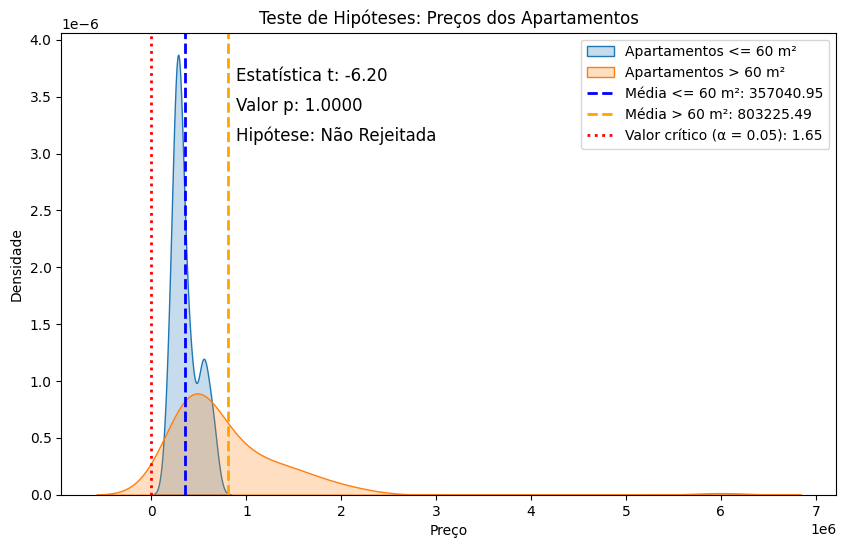

Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

# Dados fictícios (substituir pelos dados reais)
bairro = 'Jardim Botânico'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60').sample(n=100, random_state=101).preco
base_maior_area = base_temp.query('metragem > 60').sample(n=100, random_state=101).preco

# Calcular médias e desvios padrão
media_menor_area = base_menor_area.mean()
media_maior_area = base_maior_area.mean()
dp_menor_area = base_menor_area.std()
dp_maior_area = base_maior_area.std()

# Realizar teste t
t_stat, p_value = ttest_ind(base_menor_area, base_maior_area, alternative='greater')

# Definir alpha
alpha = 0.05

# Criar gráfico
plt.figure(figsize=(10, 6))

# Distribuição das amostras
sns.kdeplot(base_menor_area, label='Apartamentos <= 60 m²', shade=True)
sns.kdeplot(base_maior_area, label='Apartamentos > 60 m²', shade=True)

# Adicionar linha para a média de cada amostra
plt.axvline(media_menor_area, color='blue', linestyle='--', linewidth=2, label=f'Média <= 60 m²: {media_menor_area:.2f}')
plt.axvline(media_maior_area, color='orange', linestyle='--', linewidth=2, label=f'Média > 60 m²: {media_maior_area:.2f}')

# Adicionar linha para o valor crítico (únicaudal)
# Valor crítico é o ponto onde a cauda direita começa
from scipy.stats import t
critical_value = t.ppf(1 - alpha, df=(len(base_menor_area) + len(base_maior_area) - 2))
plt.axvline(critical_value, color='red', linestyle=':', linewidth=2, label=f'Valor crítico (α = 0.05): {critical_value:.2f}')

# Título e legendas
plt.title('Teste de Hipóteses: Preços dos Apartamentos')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.legend()

# Exibir resultados do teste
plt.figtext(0.30, 0.8, f'Estatística t: {t_stat:.2f}', fontsize=12, ha='left')
plt.figtext(0.30, 0.75, f'Valor p: {p_value:.4f}', fontsize=12, ha='left')
plt.figtext(0.30, 0.7, f'Hipótese: {"Rejeitada" if p_value < alpha else "Não Rejeitada"}', fontsize=12, ha='left')

plt.show()

if p_value < alpha:
    print("Rejeitamos a hipótese nula: os preços dos apartamentos de até 60 m² são significativamente maiores.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.")


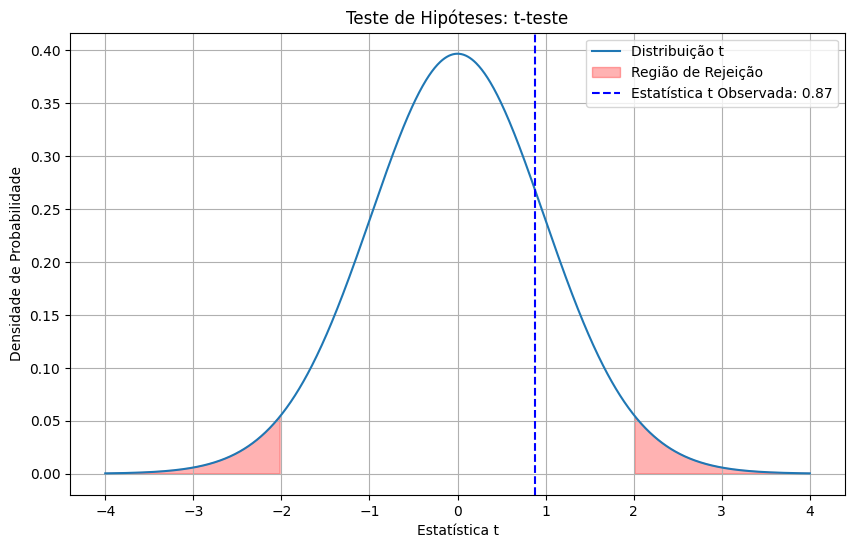

In [49]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


np.random.seed(0)
data = np.random.normal(loc=5, scale=2, size=50)


mu = 5  
alpha = 0.05

t_stat, p_value = stats.ttest_1samp(data, mu)

t_critical = stats.t.ppf(1 - alpha/2, df=len(data)-1)

# Plotar a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=len(data)-1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')
plt.fill_between(x, y, where=(x >= t_critical) | (x <= -t_critical), color='red', alpha=0.3, label='Região de Rejeição')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Estatística t Observada: {t_stat:.2f}')
plt.title('Teste de Hipóteses: t-teste')
plt.xlabel('Estatística t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
#carregando bibliotecas para manipulacao de dados
import pandas as pd
import numpy as np

#carregando bibliotecas para plotar graficos interativos
import plotly.express as px
import plotly.graph_objects as go



# Manipulacao de Dados

# link com a base de dados do vdem
url = 'https://raw.githubusercontent.com/mibezerra/Disserta-o/main/vdem.csv'

#carregando a base de dados
vdem_df = pd.read_csv(url, sep = ';', decimal = ',')

#imprimindo as primeiras linhas
vdem_df.head()

#calculando a media e desvio padrao de mulheres eleitas e numero de eleicoes por ano
vdem_pivot = vdem_df.pivot_table(values = 'v2lgfemleg',
                                index = 'year',
                                aggfunc = ['mean', 'std', 'count']).reset_index()
                        
## erro padrao
vdem_pivot['std_error'] = vdem_pivot['std'] / np.sqrt(vdem_pivot['count'])

#redefinindo os nomes das colunas
vdem_pivot.columns = ['ano', 'avg', 'std', 'n', 'std_error']

##intervalo de confianca 90%
vdem_pivot['ci_upper90'] = vdem_pivot['avg'] + vdem_pivot['std_error'] * 1.645
vdem_pivot['ci_lower90'] = vdem_pivot['avg'] - vdem_pivot['std_error'] * 1.645

##intervalo de confianca 95%
vdem_pivot['ci_upper95'] = vdem_pivot['avg'] + vdem_pivot['std_error'] * 1.96
vdem_pivot['ci_lower95'] = vdem_pivot['avg'] - vdem_pivot['std_error'] * 1.96

##intervalo de confianca 99%
vdem_pivot['ci_upper99'] = vdem_pivot['avg'] + vdem_pivot['std_error'] * 2.58
vdem_pivot['ci_lower99'] = vdem_pivot['avg'] - vdem_pivot['std_error'] * 2.58


# Visualizacao de Dados

#salvando e plotando grafico
fig =px.line(vdem_pivot, x='ano', y='avg', labels={'avg':'Mulheres Eleitas %', 'ano':'Ano'},
    title='Mulheres Eleitas(%) nas Câmaras Baixas da América Latina (1949-2020)')
    
## grafico para 90% CI

fig2 = go.Figure([
    go.Scatter(
        name='Média',
        x=vdem_pivot['ano'],
        y=vdem_pivot['avg'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Superior',
        x=vdem_pivot['ano'],
        y=vdem_pivot['ci_upper90'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Inferior',
        x=vdem_pivot['ano'],
        y=vdem_pivot['ci_lower90'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig2.update_layout(
    yaxis_title='Mulheres Eleitas %',
    xaxis_title = 'Ano',
    title='Mulheres Eleitas(%) nas Câmaras Baixas da América Latina (1949-2020)',
    hovermode="x"
)
fig2.show()